In [316]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.tsaplots import month_plot, quarter_plot , plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose  

In [317]:
df = pd.read_csv("Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting/bitcoin_price.csv")

In [318]:
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")

In [319]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3387,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [320]:
df.set_index('Date', inplace=True)

In [321]:
df.loc['2021-11-09']

Open         6.754973e+04
High         6.853034e+04
Low          6.638206e+04
Close        6.697183e+04
Adj Close    6.697183e+04
Volume       4.235799e+10
Name: 2021-11-09 00:00:00, dtype: float64

In [322]:
df.resample('W').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,465.864014,468.174011,452.421997,457.334015,457.334015,37919700
2014-09-28,435.751007,441.557007,421.131989,435.790985,435.790985,45099500
2014-10-05,387.427002,391.378998,380.779999,386.944000,386.944000,83308096
2014-10-12,364.687012,382.726013,356.144012,378.549011,378.549011,83641104
2014-10-19,400.954987,411.697998,391.324005,400.869995,400.869995,38491500
...,...,...,...,...,...,...
2023-12-03,39472.207031,40135.605469,39298.164062,39978.390625,39978.390625,23512784002
2023-12-10,44180.019531,44705.515625,43627.597656,44166.601562,44166.601562,39856129827
2023-12-17,43792.019531,43808.375000,41767.089844,43023.972656,43023.972656,40632672038


In [323]:
df['7_day_closing_avg'] = df['Close'].rolling(window=7).mean()

<Axes: xlabel='Date'>

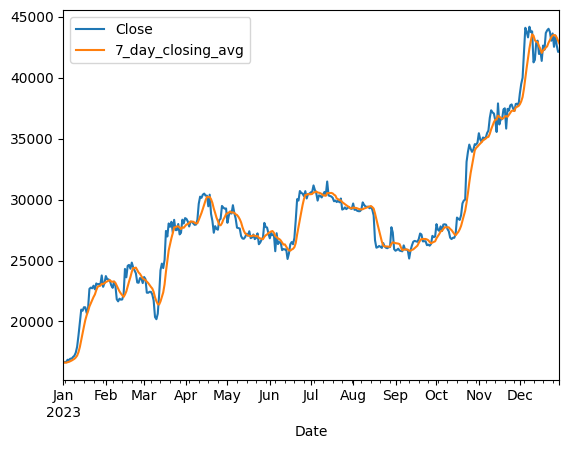

In [324]:
df[['Close','7_day_closing_avg']].loc['2023'].plot()

In [325]:
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [326]:
df['daily_returns_pct'] = df['Close'].pct_change()

In [327]:
df

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_pct
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-0.024659
...,...,...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688,-0.025055
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183,0.021694
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058,-0.018760


In [328]:
df[df['daily_returns_pct'].abs() > 0.1]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_pct
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,0.151936
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-0.107767
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-0.156593
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-0.211449
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,0.178217
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,0.106122
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-0.100061
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-0.143490


<Axes: title={'center': 'Daily Closing Price'}, xlabel='Date'>

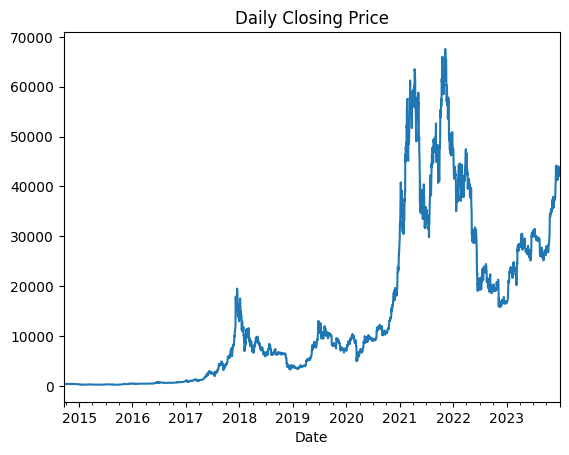

In [329]:
df['Close'].plot(title='Daily Closing Price')

In [330]:
df['30_day_rolling_vol'] = df['Volume'].rolling(window=30).mean()

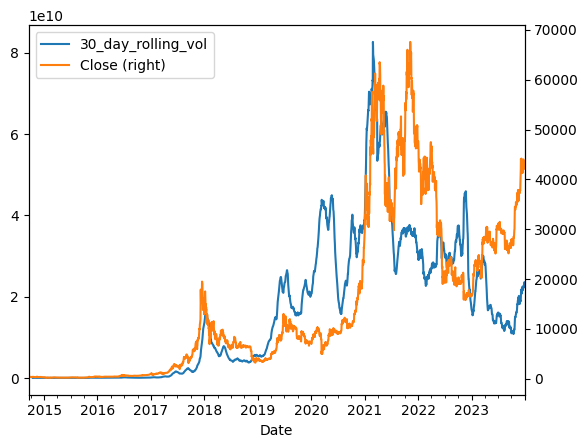

In [331]:
df[['30_day_rolling_vol']].plot(legend=True) 

ax = df['Close'].plot(secondary_y=True, legend=True) 
ax.set_label("Closing Price")
plt.show()

In [332]:
df.isna().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
7_day_closing_avg      6
daily_returns_pct      1
30_day_rolling_vol    29
dtype: int64

In [333]:
df['30_day_rolling_vol'] = df['30_day_rolling_vol'].bfill()

In [334]:
df['7_day_closing_avg'] = df['7_day_closing_avg'].interpolate(method='linear')

In [335]:
df.index.dayofweek

Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       ...
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
      dtype='int32', name='Date', length=3392)

In [336]:
df['year'] = df.index.year 
df['month'] = df.index.month  

df['day'] = df.index.day 
df['day_of_week'] = df.index.dayofweek 
df['weekday'] = df.index.day_name() 
df['weekday_numeric'] = df.index.weekday 

df['is_weekend'] = df['weekday_numeric'].isin([5,6]) 
df.head()



,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_pct,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-0.071926,3.624856e+07,2014,9,18,3,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-0.069843,3.624856e+07,2014,9,19,4,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,0.035735,3.624856e+07,2014,9,20,5,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-0.024659,3.624856e+07,2014,9,21,6,Sunday,6,True


In [337]:
df['lag_1'] = df['Close'].shift(1) 
df['lag_2'] = df['Close'].shift(2)

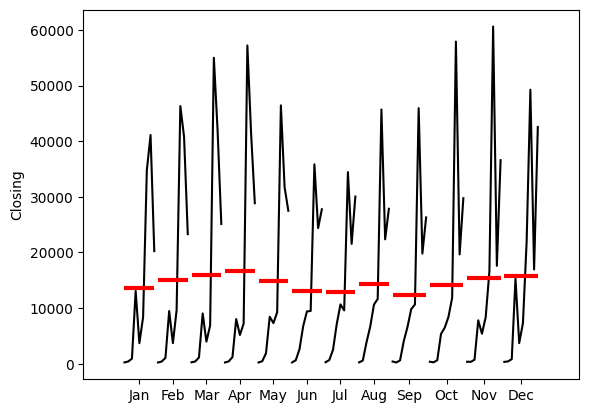

In [338]:
month_plot(df['Close'].resample('ME').mean(), ylabel='Closing'); 

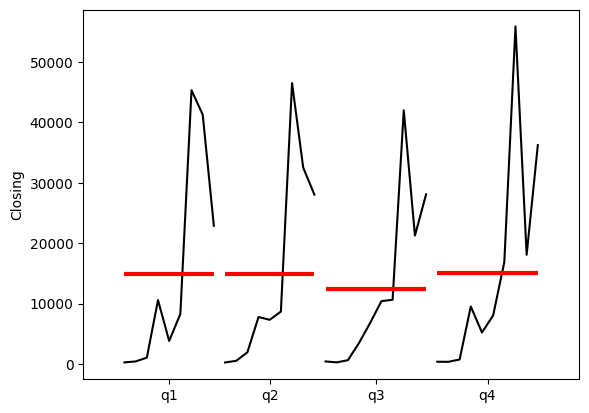

In [339]:
quarter_plot(df['Close'].resample('QE').mean(), ylabel='Closing'); 

In [340]:
df_choco = pd.read_csv(r"Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting/choco_monthly_revenue.csv", index_col='Month with Year', parse_dates=True)

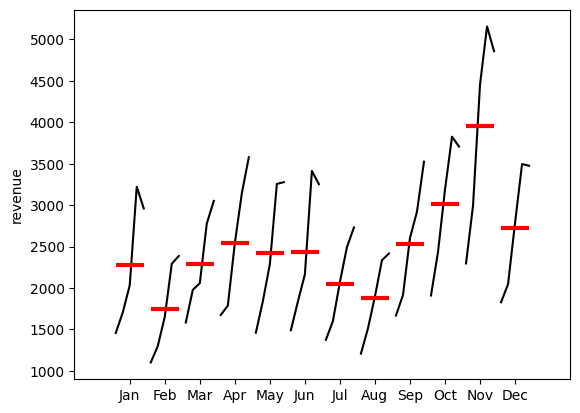

In [341]:
month_plot(df_choco['revenue'], ylabel='revenue'); 

In [342]:
df

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_pct,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend,lag_1,lag_2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,False,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-0.071926,3.624856e+07,2014,9,18,3,Thursday,3,False,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-0.069843,3.624856e+07,2014,9,19,4,Friday,4,False,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,0.035735,3.624856e+07,2014,9,20,5,Saturday,5,True,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-0.024659,3.624856e+07,2014,9,21,6,Sunday,6,True,408.903992,394.795990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688,-0.025055,2.315280e+10,2023,12,26,1,Tuesday,1,False,43613.140625,43016.117188
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183,0.021694,2.336140e+10,2023,12,27,2,Wednesday,2,False,42520.402344,43613.140625
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058,-0.018760,2.340460e+10,2023,12,28,3,Thursday,3,False,43442.855469,42520.402344


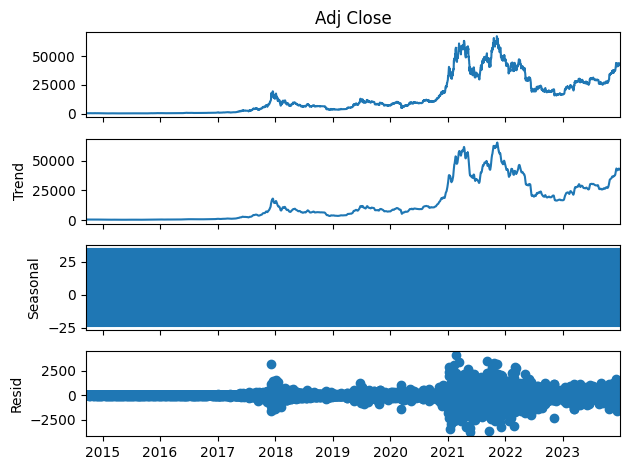

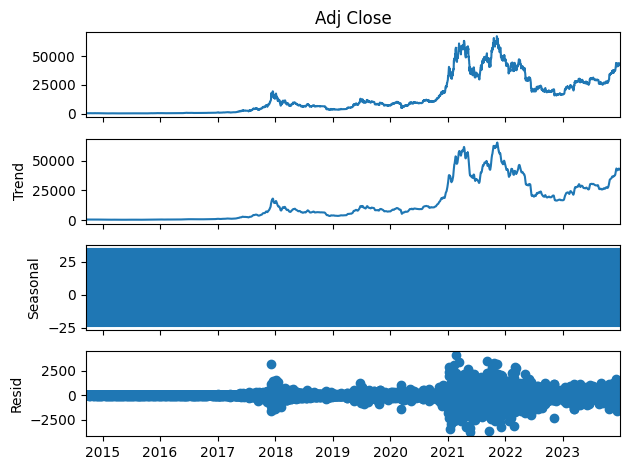

In [344]:
decomposition = seasonal_decompose(df['Adj Close'], model='additive', period=7)
fig = decomposition.plot() 
fig 

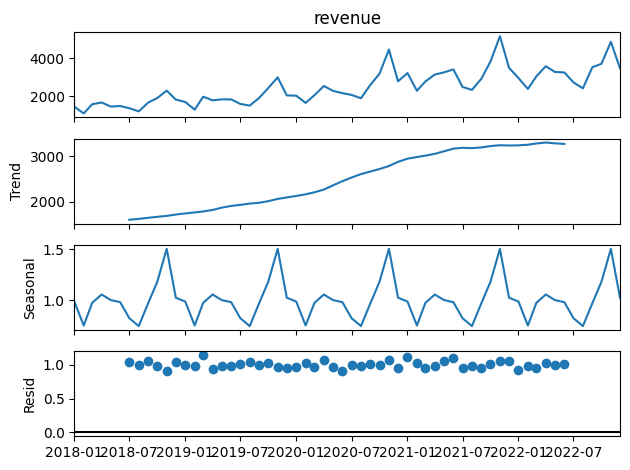

In [346]:
decomposition = seasonal_decompose(df_choco['revenue'], model='multiplicative', period=12) 

fig = decomposition.plot() 
fig;

ACF - Measures how current values correlate with their own past value over different lags. It dosen't control for intermediate lags. 

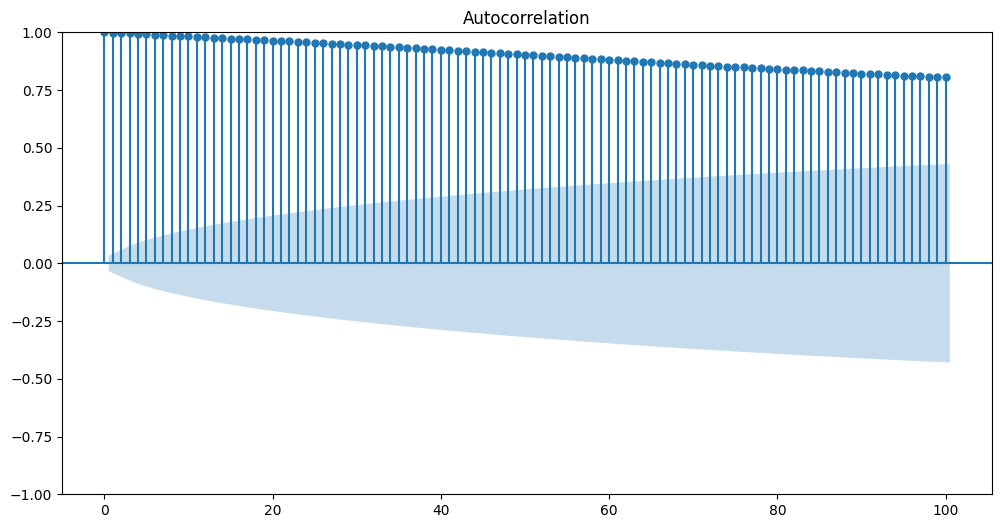

In [348]:
fig, ax = plt.subplots(figsize = (12,6)) 
plot_acf(df['Adj Close'], lags=100, ax = ax);


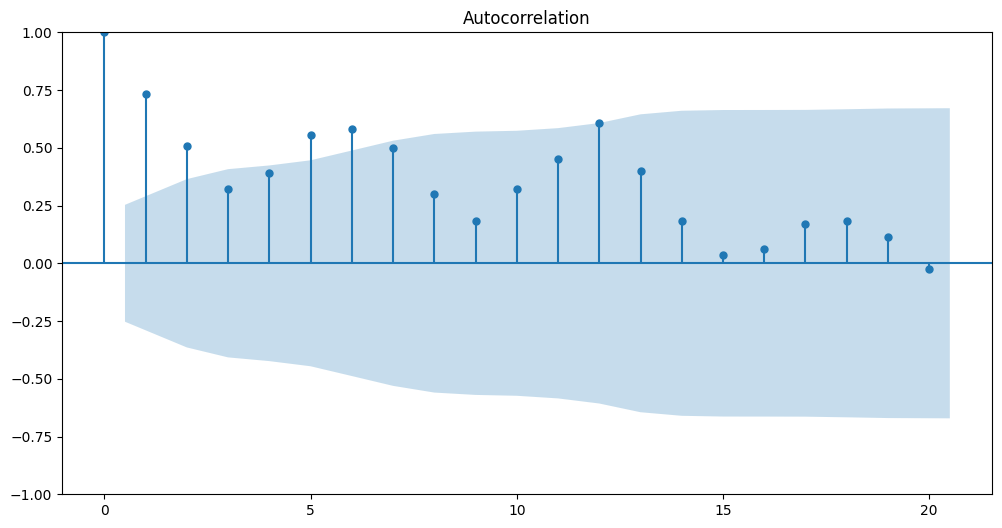

In [349]:
fig, ax = plt.subplots(figsize = (12,6)) 
plot_acf(df_choco['revenue'], lags=20, ax = ax);


In [353]:
# pacf measures the correlation with a certain lag after removing the effects of shorter lags. 

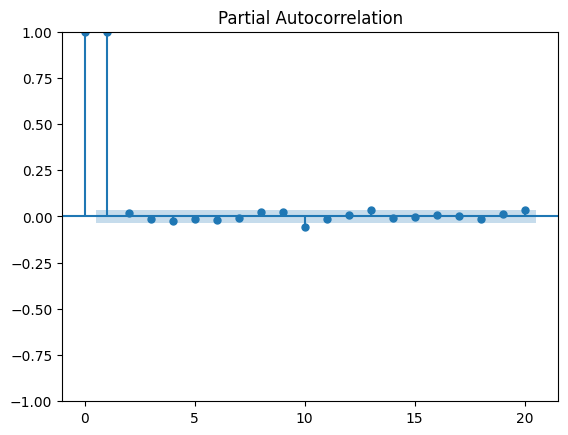

In [352]:
fig, ax = plt.subplots() 
plot_pacf(df['Adj Close'], lags=20, ax = ax);


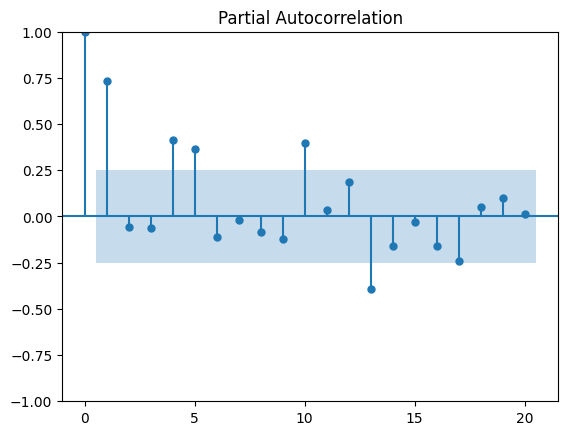

In [354]:
fig, ax = plt.subplots() 
plot_pacf(df_choco['revenue'], lags=20, ax = ax);
